In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
from tqdm import tqdm

In [8]:
# load data form 'single_task.csv'
data = pd.read_csv('single_task.csv')
data.head()

,model,dataset,accuracy,config,method,version,LoRA.r,batch_size,steps,lr,weight_decay
0,flan-t5-base,glue-cola,0.695110,{'model': {'model': {'_target_': 'transformers...,fullfinetuned,0,NaN,16.0,2000.0,0.00001,0.0
1,flan-t5-base,glue-cola,0.752637,{'model': {'model': {'_target_': 'transformers...,fullfinetuned,1,NaN,16.0,2000.0,0.00002,0.0
2,flan-t5-base,glue-cola,0.623202,{'model': {'model': {'_target_': 'transformers...,l_lora,4,16.0,16.0,2000.0,0.00001,0.0
3,flan-t5-base,glue-cola,0.688399,{'model': {'model': {'_target_': 'transformers...,l_lora,5,16.0,16.0,2000.0,0.00002,0.0
4,flan-t5-base,glue-cola,0.689358,{'model': {'model': {'_target_': 'transformers...,l_lora,6,16.0,16.0,2000.0,0.00003,0.0


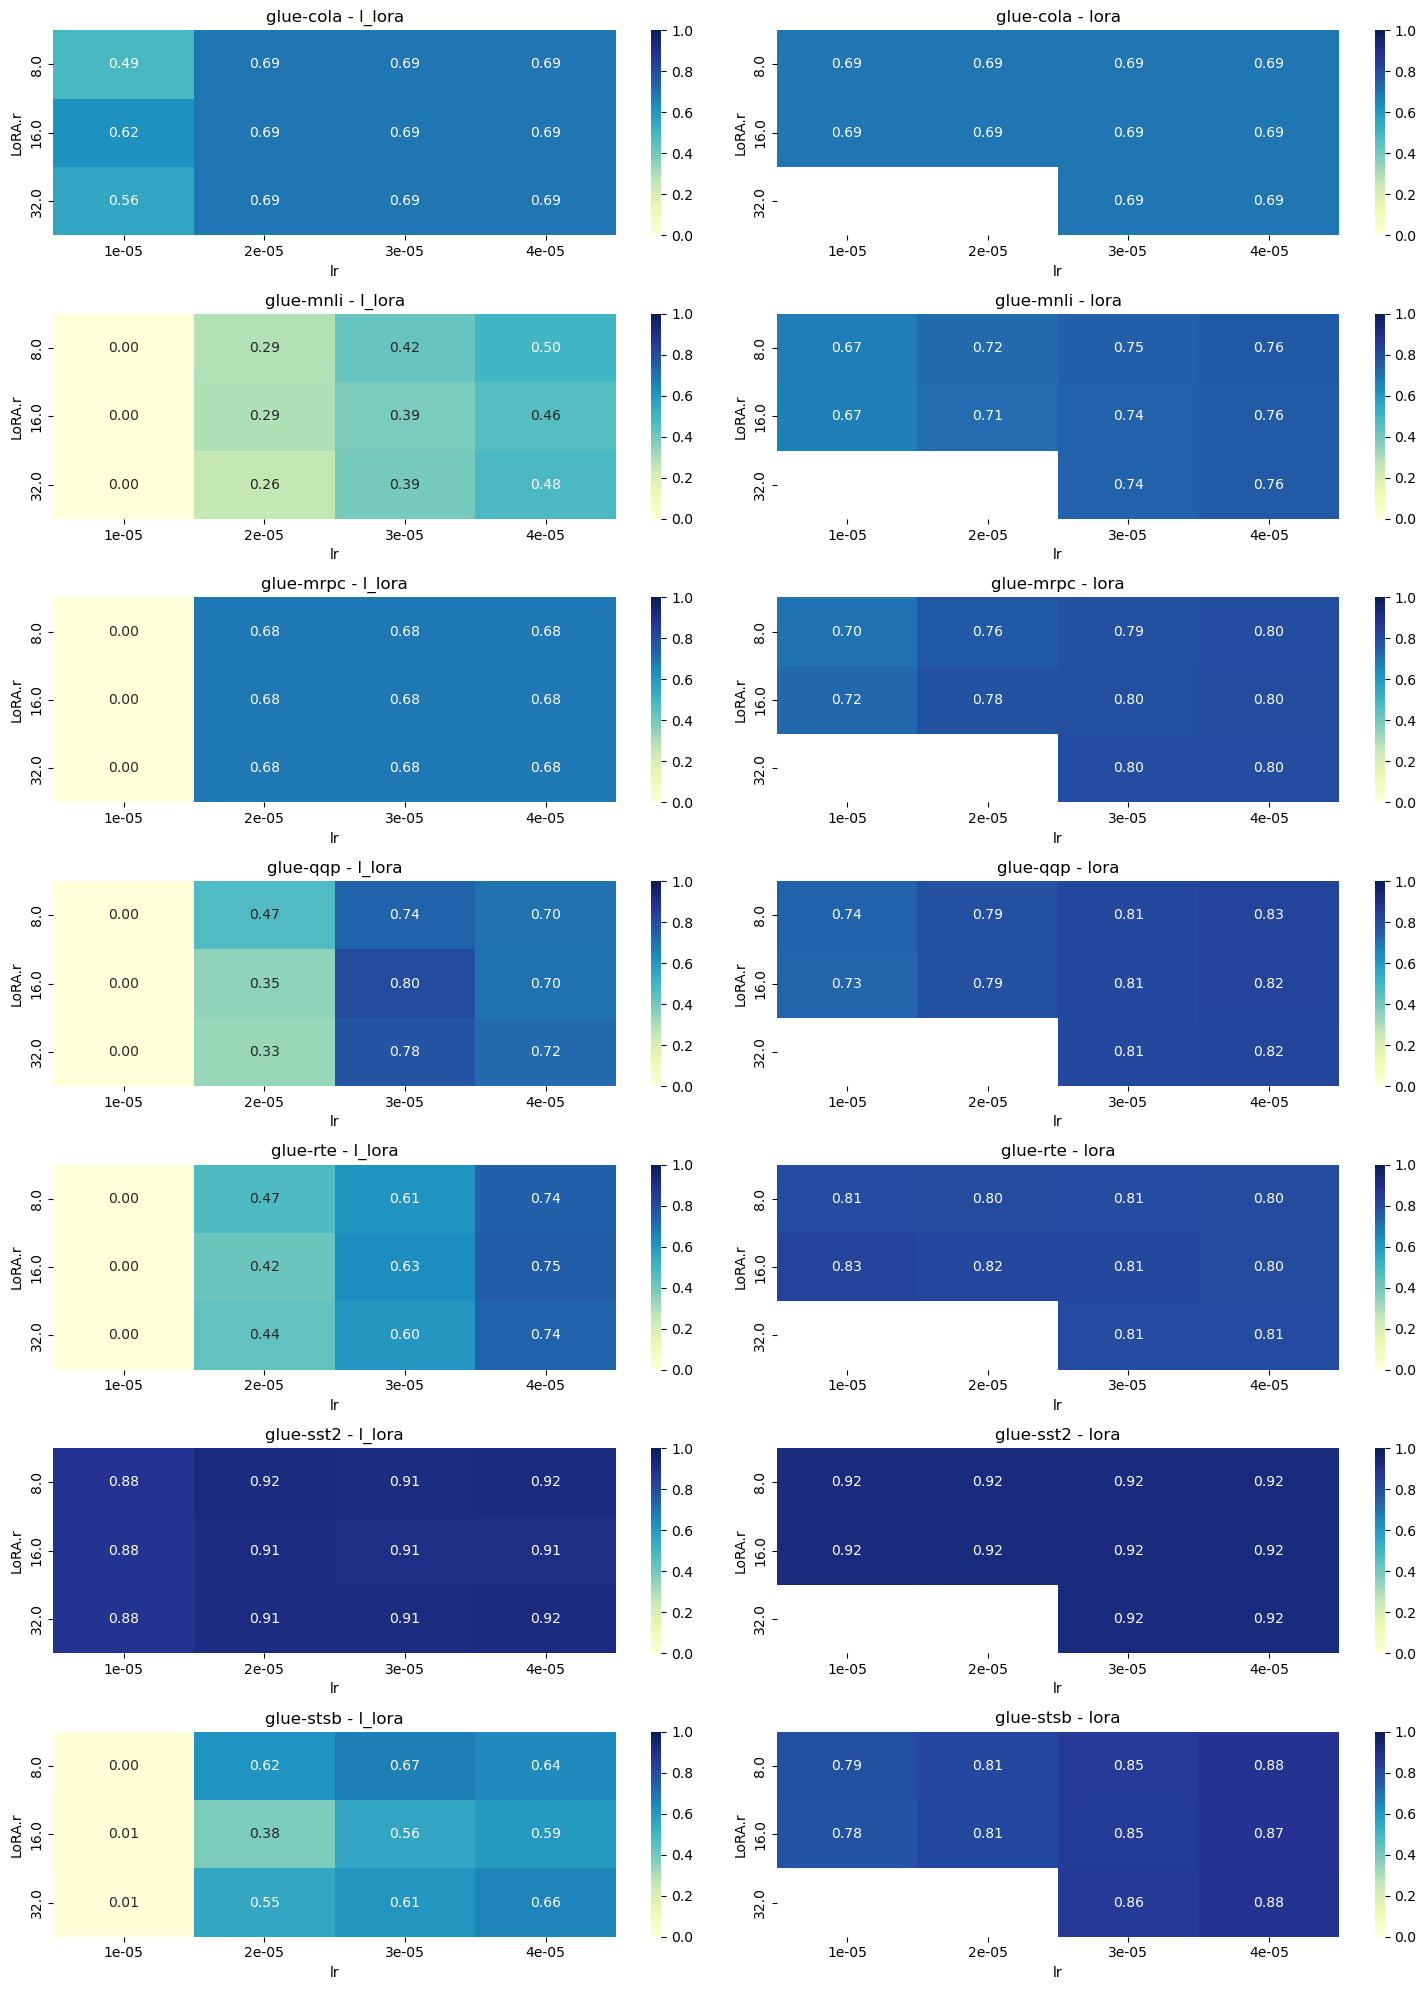

In [9]:
num_datasets = data.dataset.nunique()
num_method = data.method.nunique() - 1  # exclude fullfinetuned
dataset_id = {name: i for i, name in enumerate(data.dataset.unique())}
method_id = {
    name: i
    for i, name in enumerate(
        filter(lambda name: name != "fullfinetuned", data.method.unique())
    )
}

fig, axes = plt.subplots(num_datasets, num_method, figsize=(15, 20))
for task_grp in data.groupby(by="dataset"):
    row = dataset_id[task_grp[0]]
    for method_grp in task_grp[1].groupby(by="method"):
        if method_grp[0] == "fullfinetuned":
            continue
        col = method_id[method_grp[0]]
        ax = axes[row, col]

        plot_data = method_grp[1].pivot(index="LoRA.r", columns="lr", values="accuracy")
        # plot heatmap
        sns.heatmap(
            plot_data,
            annot=True,
            fmt=".2f",
            ax=ax,
            cmap="YlGnBu",
            vmin=0.0,
            vmax=1.0,
        )
        ax.set_title(f"{task_grp[0]} - {method_grp[0]}")
        ax.set_xlabel("lr")
        ax.set_ylabel("LoRA.r")

# save figure
plt.tight_layout()
plt.savefig("heatmap_single_task.png")
plt.show()